<a href="https://colab.research.google.com/github/Dev-Atom42/MachineLearning-Calobaratory/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [25]:
import pandas as pd

df = pd.read_csv('/content/Classification Dataset/ca_offenses_by_county.csv')
df

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,NaN,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,NaN,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,NaN,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,NaN,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,NaN,112,810,"3,810","1,398","1,838",574,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Metropolitan/Nonmetropolitan          57 non-null     object 
 1   County                                57 non-null     object 
 2   Violent crime                         57 non-null     object 
 3   Murder and nonnegligent manslaughter  57 non-null     float64
 4   Rape (revised definition)             57 non-null     float64
 5   Rape(legacy definition)               0 non-null      float64
 6   Robbery                               57 non-null     object 
 7   Aggravated assault                    57 non-null     object 
 8   Property crime                        57 non-null     object 
 9   Burglary                              57 non-null     object 
 10  Larceny-theft                         57 non-null     object 
 11  Motor vehicle the

In [44]:
#Удаление
df_clean = df.copy()
df_clean = df_clean.dropna(how='all')
df_clean = df_clean.dropna(subset=[5], axis=1) #6-й столбец не удалился, видимо полностью состоит из Not-a-Number
df_clean

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,112,810,"3,810","1,398","1,838",574,145.0
5,Metropolitan Counties,Imperial3,219,0.0,6.0,7,206,625,202,395,28,21.0
6,Metropolitan Counties,Kern,"2,235",31.0,157.0,360,"1,687","9,903","3,243","4,777","1,883",300.0
7,Metropolitan Counties,Kings3,122,2.0,16.0,9,95,470,193,265,12,5.0
8,Metropolitan Counties,Los Angeles,"5,173",98.0,304.0,"1,212","3,559","16,301","3,739","8,359","4,203",215.0
9,Metropolitan Counties,Madera,334,1.0,18.0,26,289,"1,252",556,686,10,4.0


In [45]:
import numpy as np
#Заполнение при помощи медианы
df_new = df.copy()
df_new = df_new.dropna(subset=[5], axis=1) #одни? наны

columns = ['Violent crime', 'Murder and nonnegligent manslaughter', 'Rape (revised definition)', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']

for column_name in columns:
  df_new[column_name] = df_new[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
  df_new[column_name].fillna(df_new[column_name].median(), inplace=True) #медиана

df_new

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.0,6.0,13.0,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte3,155.0,4.0,20.0,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,426.0,14.0,24.0,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado3,252.0,9.0,46.0,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,962.0,8.0,32.0,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,213.0,3.0,18.0,20.0,164.0,837.0,347.0,489.0,14.0,6.0
2588,NaN,NaN,213.0,3.0,18.0,20.0,164.0,837.0,347.0,489.0,14.0,6.0
2589,NaN,NaN,213.0,3.0,18.0,20.0,164.0,837.0,347.0,489.0,14.0,6.0
2590,NaN,NaN,213.0,3.0,18.0,20.0,164.0,837.0,347.0,489.0,14.0,6.0


In [46]:
#Заполнение при помощи среднего
df_new1 = df.copy()
df_new1 = df_new1.dropna(subset=[5], axis=1)

columns = ['Violent crime', 'Murder and nonnegligent manslaughter', 'Rape (revised definition)', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']

for column_name in columns:
  df_new1[column_name] = df_new1[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
  df_new1[column_name].fillna(df_new1[column_name].mean(), inplace=True) #среднее

df_new1

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.000000,6.000000,13.000000,177.000000,314.00000,2077.000000,463.000000,985.000000,629.000000,11.000000
1,Metropolitan Counties,Butte3,155.000000,4.000000,20.000000,14.000000,117.00000,1422.000000,708.000000,693.000000,21.000000,0.000000
2,Metropolitan Counties,Contra Costa,426.000000,14.000000,24.000000,153.000000,235.00000,2013.000000,660.000000,1332.000000,21.000000,18.000000
3,Metropolitan Counties,El Dorado3,252.000000,9.000000,46.000000,32.000000,165.00000,2031.000000,577.000000,1412.000000,42.000000,4.000000
4,Metropolitan Counties,Fresno,962.000000,8.000000,32.000000,112.000000,810.00000,3810.000000,1398.000000,1838.000000,574.000000,145.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,438.491228,6.614035,32.385965,81.719298,317.77193,1850.877193,568.070175,1063.614035,219.192982,20.526316
2588,NaN,NaN,438.491228,6.614035,32.385965,81.719298,317.77193,1850.877193,568.070175,1063.614035,219.192982,20.526316
2589,NaN,NaN,438.491228,6.614035,32.385965,81.719298,317.77193,1850.877193,568.070175,1063.614035,219.192982,20.526316
2590,NaN,NaN,438.491228,6.614035,32.385965,81.719298,317.77193,1850.877193,568.070175,1063.614035,219.192982,20.526316


In [47]:
#Заполнение при помощи моды
df_new2 = df.copy()
df_new2 = df_new2.dropna(subset=[5], axis=1)

columns = ['Violent crime', 'Murder and nonnegligent manslaughter', 'Rape (revised definition)', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']

for column_name in columns:
  df_new2[column_name] = df_new2[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
  df_new2[column_name].fillna(df_new2[column_name].mode()[0], inplace=True) #мода вместо значений 0

df_new2

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.0,6.0,13.0,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte3,155.0,4.0,20.0,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,426.0,14.0,24.0,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado3,252.0,9.0,46.0,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,962.0,8.0,32.0,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,34.0,0.0,2.0,0.0,165.0,31.0,380.0,19.0,1.0,0.0
2588,NaN,NaN,34.0,0.0,2.0,0.0,165.0,31.0,380.0,19.0,1.0,0.0
2589,NaN,NaN,34.0,0.0,2.0,0.0,165.0,31.0,380.0,19.0,1.0,0.0
2590,NaN,NaN,34.0,0.0,2.0,0.0,165.0,31.0,380.0,19.0,1.0,0.0


In [49]:
#Заполнение при помощи интерполяции
df_new2 = df.copy()
df_new2 = df_new2.dropna(subset=[5], axis=1)

columns = ['Violent crime', 'Murder and nonnegligent manslaughter', 'Rape (revised definition)', 'Robbery', 'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft', 'Arson']

for column_name in columns:
  df_new2[column_name] = df_new2[column_name].astype(str).str.replace('[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
  df_new2[column_name].fillna(df_new2[column_name].interpolate(), inplace=True) #интерполяция

df_new2

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.0,6.0,13.0,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte3,155.0,4.0,20.0,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,426.0,14.0,24.0,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado3,252.0,9.0,46.0,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,962.0,8.0,32.0,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,185.0,0.0,49.0,22.0,114.0,749.0,413.0,330.0,6.0,2.0
2588,NaN,NaN,185.0,0.0,49.0,22.0,114.0,749.0,413.0,330.0,6.0,2.0
2589,NaN,NaN,185.0,0.0,49.0,22.0,114.0,749.0,413.0,330.0,6.0,2.0
2590,NaN,NaN,185.0,0.0,49.0,22.0,114.0,749.0,413.0,330.0,6.0,2.0


##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


count    57.000000
mean      6.614035
std      14.315020
min       0.000000
25%       1.000000
50%       3.000000
75%       6.000000
max      98.000000
Name: Murder and nonnegligent manslaughter, dtype: float64

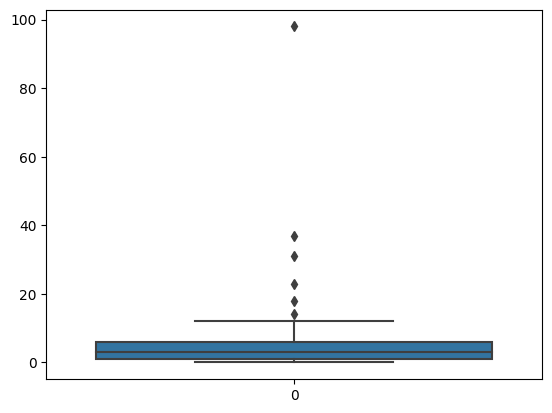

In [62]:
import seaborn as sns
sns.boxplot(df["Murder and nonnegligent manslaughter"])
df["Murder and nonnegligent manslaughter"].describe()

In [115]:
mean = df["Murder and nonnegligent manslaughter"].mean()
std = df["Murder and nonnegligent manslaughter"].std()
custom_std = std * 3 #Что больше 14*3, то считать выбросом

emissions = [x for x in df["Murder and nonnegligent manslaughter"] if abs(x - mean) > custom_std]
#anomaly = [x for x in df["Murder and nonnegligent manslaughter"] if abs(x - mean) > std]
print("Выбросы:", emissions)

Выбросы: [98.0]


In [119]:
#Методом среднего
mean = df["Murder and nonnegligent manslaughter"].mean()
maximum = mean * 3

df_mean = df[abs((df["Murder and nonnegligent manslaughter"] - mean) < maximum)]
df_mean["Murder and nonnegligent manslaughter"].describe()


count    54.000000
mean      3.907407
std       4.779155
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max      23.000000
Name: Murder and nonnegligent manslaughter, dtype: float64

In [100]:
#При помощи межквартильного размаха
Q1 =  df["Murder and nonnegligent manslaughter"].quantile(0.25)
Q3 = df["Murder and nonnegligent manslaughter"].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df["Murder and nonnegligent manslaughter"] > (Q1-1.5*IQR )) & (df["Murder and nonnegligent manslaughter"] < (Q3+1.5*IQR))]
df_IQR["Murder and nonnegligent manslaughter"].describe()
#df_IQR

count    51.000000
mean      3.058824
std       3.190058
min       0.000000
25%       1.000000
50%       2.000000
75%       4.500000
max      12.000000
Name: Murder and nonnegligent manslaughter, dtype: float64

<Axes: >

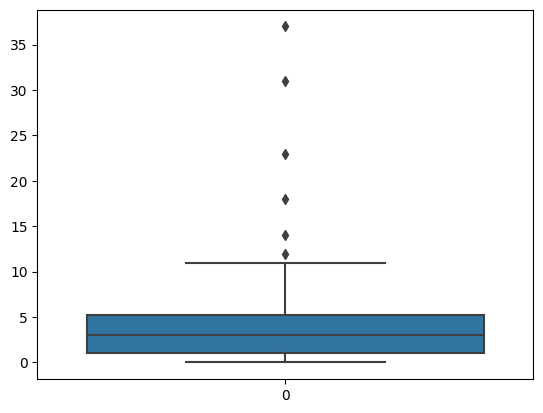

In [84]:
#Статистика и объяснение
without_emissions = [x for x in df["Murder and nonnegligent manslaughter"] if abs(x - mean) <= custom_std]
sns.boxplot(without_emissions)

**Объяснения**
Значение 98 очень сильно отличается от других значений (по графику особенно это видно), очевидно, что это выброс и от него надо бы избавиться. Остальные выходящие значения - аномалии.

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [91]:
#Проверка на дубли
doubles = df[df.duplicated()]
doubles

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#Удаление дублей
kill_em_all = df.drop_duplicates()
kill_em_all

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510,6.0,13.0,NaN,177,314,"2,077",463,985,629,11.0
1,Metropolitan Counties,Butte3,155,4.0,20.0,NaN,14,117,"1,422",708,693,21,0.0
2,Metropolitan Counties,Contra Costa,426,14.0,24.0,NaN,153,235,"2,013",660,"1,332",21,18.0
3,Metropolitan Counties,El Dorado3,252,9.0,46.0,NaN,32,165,"2,031",577,"1,412",42,4.0
4,Metropolitan Counties,Fresno,962,8.0,32.0,NaN,112,810,"3,810","1,398","1,838",574,145.0
5,Metropolitan Counties,Imperial3,219,0.0,6.0,NaN,7,206,625,202,395,28,21.0
6,Metropolitan Counties,Kern,"2,235",31.0,157.0,NaN,360,"1,687","9,903","3,243","4,777","1,883",300.0
7,Metropolitan Counties,Kings3,122,2.0,16.0,NaN,9,95,470,193,265,12,5.0
8,Metropolitan Counties,Los Angeles,"5,173",98.0,304.0,NaN,"1,212","3,559","16,301","3,739","8,359","4,203",215.0
9,Metropolitan Counties,Madera,334,1.0,18.0,NaN,26,289,"1,252",556,686,10,4.0


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [103]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating instances
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

column = df.select_dtypes(include=['float64']).columns
scale = df.copy()
scale[column] = min_max_scaler.fit_transform(df[column])
scale.Robbery.unique()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


array(['177', '14', '153', '32', '112', '7', '360', '9', '1,212', '26',
       '20', '30', '48', '3', '28', '36', '172', '1,026', '4', '141',
       '161', '15', '90', '24', '40', '58', '122', '10', '64', '16', '5',
       '0', '8', '13', '45', '17', '1', '2', '6', '22', nan], dtype=object)

Масштабируйте категориальные признаки через OneHotEncoder

In [114]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

df['Metropolitan/Nonmetropolitan'] = df['Metropolitan/Nonmetropolitan'].astype("category")
df['County'] = df['County'].astype("category") #превращаем в категорию

column = df.select_dtypes(include=['category']).columns
abcd = pd.get_dummies(df, columns=column, drop_first=True)
efgh = encoder.fit_transform(df[column])
klmn = encoder.get_feature_names_out(column)
#abcd
klmn

array(['Metropolitan/Nonmetropolitan_Metropolitan Counties',
       'Metropolitan/Nonmetropolitan_Nonmetropolitan Counties',
       'Metropolitan/Nonmetropolitan_nan', 'County_Alameda',
       'County_Alpine3', 'County_Amador3', 'County_Butte3',
       'County_Calaveras3', 'County_Colusa3', 'County_Contra Costa',
       'County_Del Norte3', 'County_El Dorado3', 'County_Fresno',
       'County_Glenn3', 'County_Humboldt3', 'County_Imperial3',
       'County_Inyo3', 'County_Kern', 'County_Kings3', 'County_Lake3',
       'County_Lassen3', 'County_Los Angeles', 'County_Madera',
       'County_Marin', 'County_Mariposa', 'County_Mendocino',
       'County_Merced', 'County_Modoc3', 'County_Mono3',
       'County_Monterey', 'County_Napa', 'County_Nevada', 'County_Orange',
       'County_Placer', 'County_Plumas3', 'County_Riverside',
       'County_Sacramento', 'County_San Benito', 'County_San Bernardino',
       'County_San Diego', 'County_San Joaquin',
       'County_San Luis Obispo3', 'County

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])